In [98]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

Problem 1 Part B

It looks like the fidelity actually waves as tg (the time span of the drive) increases. From what it seems the every time fidelity spikes again it becomes slightly more than the previous spike but at after about tg=12.5 each fidelity peak basically converged at 1. This could just be due to the discreteness of my tlists or tglists.

V0 = 0.16666952354383652

tg = 18.84923282188125

wd = 1.0 = wq

phi = 0

Side note: every time I increase tg by 2pi fidelity peaks again aka when V0=1/2n where n is an int.

In [99]:
def drive(t, wd, V0, phi):
    return V0 * np.cos(wd*t + phi)

best freaking tg: 18.84923282188125
best freaking fidelity: 0.9988229772925803
best freaking V0: 0.16666952354383652


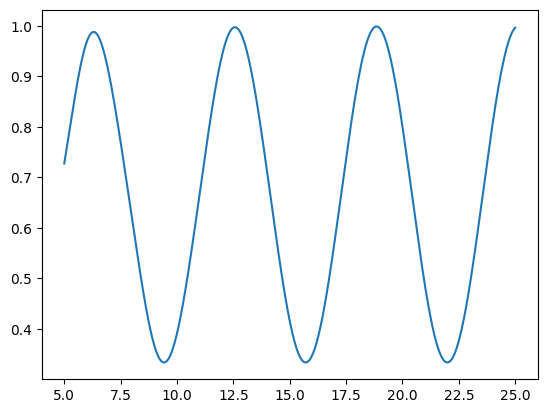

In [100]:
fidelityList = {}

wq = 1.0
wd = 1.0
phi = 0
theta = np.pi
sigz = qt.sigmaz()
sigx = qt.sigmax()
U_target = sigx

H0 = wq / 2 * sigz
eigenvalues, eigenstates = H0.eigenstates()
H = [H0, [sigx, drive]]
psi0 = eigenstates[0]
psi1 = eigenstates[1]

def qubit_fidelity(U_target, U_sim):
    t0 = psi0.dag() * U_target.dag() * U_sim * psi0
    t1 = psi1.dag() * U_target.dag() * U_sim * psi1
    trace =  t0 + t1
    return (np.abs(trace)**2 + 2) / 6

tglist = np.linspace(5, 25, 1500)
for tg in tglist:
    V0 = theta / tg
    tlist = np.linspace(0, tg, 200)
    args = {"V0": V0, "wd": wd, "phi": phi}

    psi_t0 = qt.sesolve(H, psi0, tlist, args=args)
    psi_t1 = qt.sesolve(H, psi1, tlist, args=args)

    U_sim = psi_t0.states[-1] * psi0.dag() + psi_t1.states[-1] * psi1.dag()
    fidelityList[qubit_fidelity(U_target, U_sim)] = tg

print(f"best freaking tg: {fidelityList[max(fidelityList.keys())]}\nbest freaking fidelity: {max(fidelityList.keys())}")
print("best freaking V0:", np.pi / fidelityList[max(fidelityList.keys())])

plt.plot(tglist, list(fidelityList.keys()))
plt.show()

In [101]:
# probs0 = []
# probs1 = []
# for state in psi_t0.states:
#     probs0.append(np.abs(psi0.dag() * state)**2)
#     probs1.append(np.abs(psi1.dag() * state)**2)

# plt.title("Probability of Observing Eigenstates")
# plt.ylabel("Probability")
# plt.xlabel("Time (t)")
# plt.plot(tlist, probs0, label="psi0")
# plt.plot(tlist, probs1, label="psi1")
# plt.legend()
# plt.show()